Lectura de archivos y carga de datos

In [1]:
!git clone https://github.com/ichiP245/micrography-imgpro.git

Cloning into 'micrography-imgpro'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 138 (delta 30), reused 23 (delta 4), pack-reused 66 (from 1)
Receiving objects: 100% (138/138), 113.79 MiB | 16.31 MiB/s, done.
Resolving deltas: 100% (48/48), done.
Updating files: 100% (38/38), done.


In [2]:
import sys
sys.path.append('/content/micrography-imgpro')

# Verifica que el módulo esté en la ruta antes de intentar importarlo
print("Python path updated. Trying to import getmeresults...")

Python path updated. Trying to import getmeresults...


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
df0 = pd.read_csv('/content/micrography-imgpro/ArchivosEntrega01/df_results24.csv', index_col=0)
df1 = pd.read_csv('/content/micrography-imgpro/ArchivosEntrega01/df_results25simil26.csv', index_col=0)
df2 = pd.read_csv('/content/micrography-imgpro/ArchivosEntrega01/df_results25cercano.csv', index_col=0)

In [ ]:
# Chequeamos que las columnas estan en el orden correcto
pd.concat([pd.DataFrame(df0.columns).T, pd.DataFrame(df1.columns).T, pd.DataFrame(df2.columns).T])

,0,1,2,3,4,5,6
0,Image Paths,pores,fibers,resin,undefined,sumcheck,Tanda
0,Image Paths,pores,fibers,resin,undefined,sumcheck,Tanda
0,Image Paths,pores,fibers,resin,undefined,sumcheck,Tanda


## Agregamos las escalas

In [161]:
def limpieza_txt_escala(path_txt):
  df_escala = pd.read_csv(path_txt,header=None)
  df_escala = df_escala.drop(columns=1)
  df_escala = df_escala[0].str.split(':',expand=True)
  df_escala = df_escala.rename(columns={0:'Experimento',1:'Escala (micrones)'})
  for col in df_escala.columns:
    df_escala[col] = df_escala[col].str.strip()
  return df_escala

In [162]:
def limpieza_col_experimento(df_escala):
  df_escala['Experimento bis'] = df_escala['Experimento']
  for i in range(len(df_escala)):
    if i==0:
      elem_anterior=df_escala.iloc[i,0]    # Esto lo puedo hacer por posicion porque estoy seguro que 'Experimento' es la columna 0
    else:
      if len(df_escala.iloc[i,0])==2:      # El len del elemento es 2 cuando no tiene el numero de experimento adelante (o sea ya hubo un registro anterior ingresado con el numero de experimento)
        df_escala.iloc[i,0] = elem_anterior[:-2]+df_escala.iloc[i,0]
      else:
        elem_anterior=df_escala.iloc[i,0]
  return df_escala

Para el df0

In [163]:
escala_df0 = limpieza_txt_escala('/content/Tubo2024.txt')

In [164]:
escala_df0.iloc[0,0] = '769--01'

In [165]:
escala_df0 = limpieza_col_experimento(escala_df0)

In [166]:
substring = 'Experiment-'
df0['Experimento'] = df0['Image Paths'].apply(lambda x: x[x.rfind(substring)+len(substring):x.rfind('.')])

In [179]:
set(df0['Experimento']) ^ set(escala_df0['Experimento'])

set()

In [180]:
len(df0) == len(escala_df0)

True

In [142]:
df0 = df0.merge(escala_df0, on='Experimento', how='inner')

Para el df1

In [169]:
escala_df1 = limpieza_txt_escala('/content/Tubo2025_simil2026.txt')
escala_df1 = limpieza_col_experimento(escala_df1)

In [170]:
df1['Experimento'] = df1['Image Paths'].apply(lambda x: x[x.rfind(substring)+len(substring):x.rfind('.')])

In [178]:
set(df1['Experimento'].values) ^ set(escala_df1['Experimento'].values)

{'1126--13', '1126--18', '1126--22'}

In [175]:
len(df1) == len(escala_df1)

False

In [144]:
df1 = df1.merge(escala_df1, on='Experimento', how='inner')

Para el df2

In [181]:
escala_df2 = limpieza_txt_escala('/content/Tubo2025_cercano_final.txt')
escala_df2 = limpieza_col_experimento(escala_df2)

In [182]:
df2['Experimento'] = df2['Image Paths'].apply(lambda x: x[x.rfind(substring)+len(substring):x.rfind('.')])

In [183]:
set(df2['Experimento'].values) ^ set(escala_df2['Experimento'].values)

set()

In [184]:
len(pd.read_csv('/content/Tubo2025_cercano_final.txt')) == len(df2)

False

In [146]:
df2 = df2.merge(escala_df2, on='Experimento', how='inner')

Concatenamos los dfs

In [ ]:
df = pd.concat([df0, df1, df2])
df.head()

,Image Paths,pores,fibers,resin,undefined,sumcheck,Tanda
0,/content/drive/MyDrive/Micrografía M2 31 3 20...,0.000000,29.094329,64.121528,6.784144,100.0,Tubos 2024
1,/content/drive/MyDrive/Micrografía M2 31 3 20...,1.867573,64.227527,30.862606,3.042294,100.0,Tubos 2024
2,/content/drive/MyDrive/Micrografía M2 31 3 20...,6.011863,33.776427,53.767458,6.444252,100.0,Tubos 2024
3,/content/drive/MyDrive/Micrografía M2 31 3 20...,5.026331,34.344522,54.051119,6.578029,100.0,Tubos 2024
4,/content/drive/MyDrive/Micrografía M2 31 3 20...,0.000000,30.568528,63.969811,5.461661,100.0,Tubos 2024


In [ ]:
df.shape

(83, 7)

Comparacion de porcentajes de cada componente entre tandas

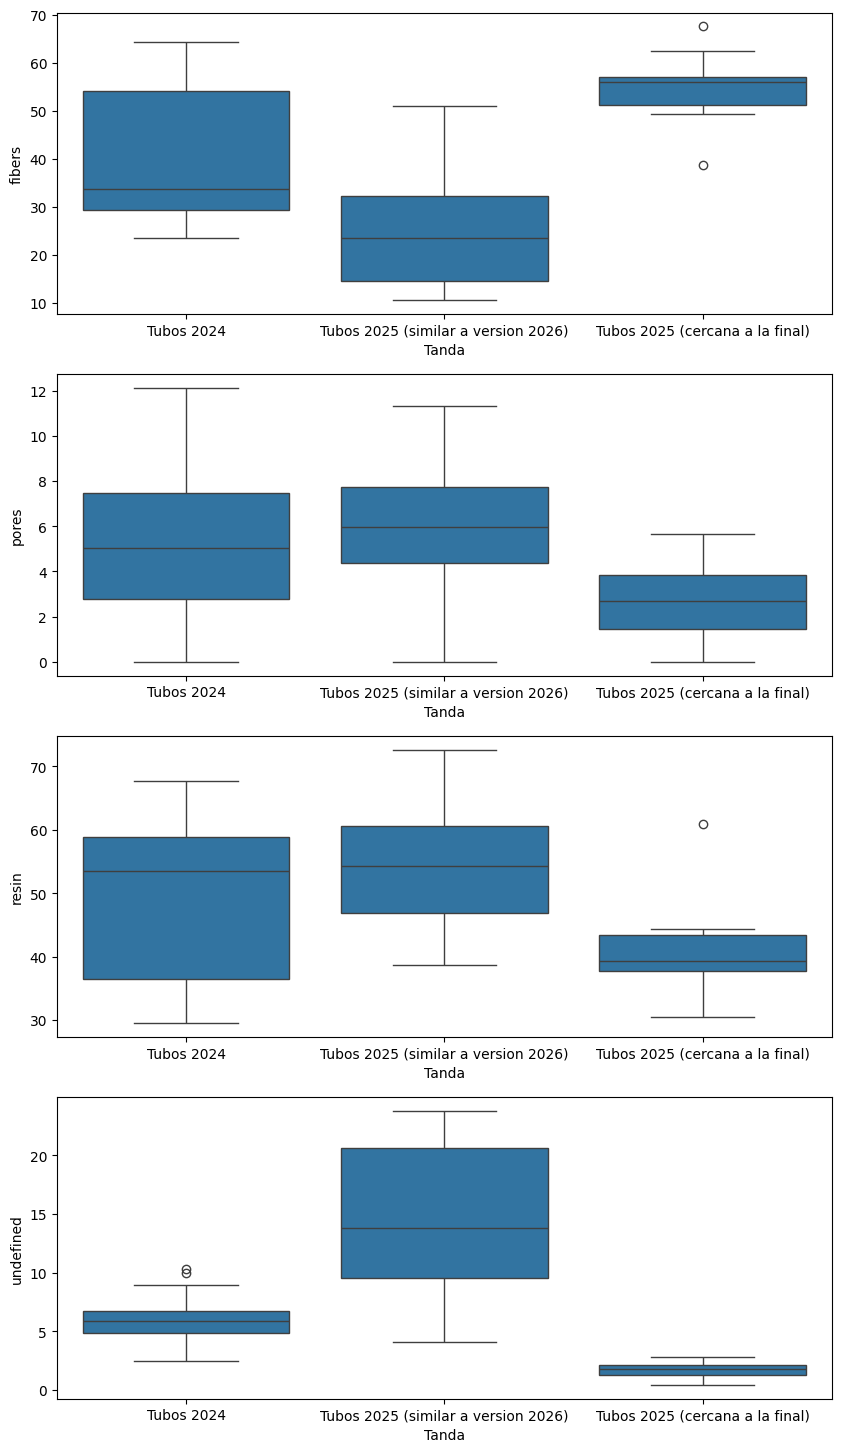

In [ ]:
fig,ax = plt.subplots(4,1, figsize=(10,18))
sns.boxplot(x='Tanda', y='fibers', data=df, ax=ax[0])
sns.boxplot(x='Tanda', y='pores', data=df, ax=ax[1])
sns.boxplot(x='Tanda', y='resin', data=df, ax=ax[2])
sns.boxplot(x='Tanda', y='undefined', data=df, ax=ax[3])
plt.show()

Estadisticos de poros

In [ ]:
df.groupby('Tanda')['pores'].describe()

,count,mean,std,min,25%,50%,75%,max
Tanda,,,,,,,,
Tubos 2024,47.0,4.888031,3.080947,0.000000,2.786965,5.026331,7.455946,12.119695
Tubos 2025 (cercana a la final),12.0,2.710708,1.745838,0.002411,1.447941,2.711444,3.851719,5.662423
Tubos 2025 (similar a version 2026),24.0,5.470784,3.451956,0.000000,4.373131,5.989077,7.754196,11.336468


Estadisticos de fibra

In [ ]:
df.groupby('Tanda')['fibers'].describe()

,count,mean,std,min,25%,50%,75%,max
Tanda,,,,,,,,
Tubos 2024,47.0,40.219718,13.365964,23.578655,29.351249,33.776427,54.141324,64.227527
Tubos 2025 (cercana a la final),12.0,54.604597,7.153581,38.644531,51.229685,56.014829,56.999891,67.548418
Tubos 2025 (similar a version 2026),24.0,25.733457,13.181109,10.572772,14.684980,23.478323,32.208406,51.032890


Test de hipotesis

In [ ]:
import scipy.stats as stats

# Get the 'pores' data for each 'Tanda' group
group_data = [df['pores'][df['Tanda'] == tanda] for tanda in df['Tanda'].unique()]

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(*group_data)

print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results (common alpha = 0.05)
alpha = 0.05
if p_value < alpha:
    print("There is a statistically significant difference between the means of 'pores' across the different 'Tanda' groups.")
else:
    print("There is no statistically significant difference between the means of 'pores' across the different 'Tanda' groups.")

F-statistic: 3.40
P-value: 0.038
There is a statistically significant difference between the means of 'pores' across the different 'Tanda' groups.


## Analisis Aletas

In [120]:
df_aletas = pd.read_csv('/content/micrography-imgpro/ArchivosEntrega01/df_results_aletas.csv',index_col=0)

In [121]:
escala_aletas = limpieza_txt_escala('/content/Escala_micrones_aletas.txt')

In [122]:
df_aletas['Experimento'] = df_aletas['Image Paths'].apply(lambda x: x[x.rfind('-')+1:x.rfind('.')])

In [123]:
df_aletas = df_aletas.merge(escala_aletas, on='Experimento', how='inner')

In [124]:
df_aletas.shape[0], escala_aletas.shape[0]

(17, 17)